In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
import json
from scipy.stats import linregress
import scipy.stats as st
import csv
import os
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import geopandas as gpd
import folium
import hvplot.pandas
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster
file_to_output = os.path.join("project-1", "output.csv")

In [2]:
#url ="https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries"
#url= "https://www.fema.gov/api/open/v1/FemaWebDisasterSummaries"
url="https://www.fema.gov/api/open/v2/HazardMitigationGrantProgramDisasterSummaries"
#filters1 = "$filter=incidentType ne 'Severe Storm'"
filters2 = "$filter=declarationDate gt '2004-01-13T04:00:00.000Z' and (incidentType eq 'Hurricane' or incidentType eq 'Typhoon' or incidentType eq 'Fire' or incidentType eq 'Flood')" 
#filters3 = "$filter=incidentType eq 'Fire'" -481
#filters4 = "$filter=incidentType eq 'Flood'" -355
#filters5 = "$filter=(incidentType eq 'Severe Ice Storm' or incidentType eq 'Snow Storm' or incidentType eq 'Winter Storm' or incidentType eq 'Freezing' or incidentType eq 'Coastal Storm' or incidentType eq 'Tropical Storm')"-106
#filters1 = "$filter=declarationDate gt '2014-01-13T04:00:00.000Z' and incidentType eq 'Severe Storm'" -1000
#filters1 = "$filter=declarationDate gt '2014-01-13T04:00:00.000Z' and (incidentType eq 'Hurricane' or incidentType eq 'Typhoon')"


In [3]:
# Send a GET request to the API
#response = requests.get(url+'?'+filters1)
response = requests.get(f"{url}?{filters2}")

In [4]:
# Send a GET request to the API


# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
    
    # Extract the list of disaster declarations
    #disasters = data.get('DisasterDeclarationsSummaries', [])
    #disasters = data.get('FemaWebDisasterSummaries',[])
    disasters = data.get('HazardMitigationGrantProgramDisasterSummaries',[])
    # Create a DataFrame from the list of disaster records
    Disaster_df = pd.DataFrame(disasters)
    #Disaster_df.drop(Disaster_df.columns[[8,11,12,14,15,16,17]], axis=1, inplace=True)
    #columns_to_drop = ['column1', 'column2']
    Disaster_df = Disaster_df.iloc[:, [0,1,2,3,4,5,6,8,10,13,23,24,25,26,27,28,29,31]]
    # Display the DataFrame
    Disaster_df
else:
    print(f"Error: {response.status_code}")

# Convert declarationDate to datetime
Disaster_df['declarationDate'] = pd.to_datetime(Disaster_df['declarationDate'])

# Create a new column with the desired format
Disaster_df['formattedDate'] = Disaster_df['declarationDate'].dt.strftime('%B %Y')
Disaster_df['formattedyear'] = Disaster_df['declarationDate'].dt.strftime('%Y')


Disaster_df


,disasterNumber,declarationDate,disasterType,incidentType,title,region,state,hmgpCloseoutStatus,hmgpReconciliationDate,hmgpPopEndDate,obligatedTotalAmount,obligatedInitiativeAmount,obligatedPlanningAmount,obligatedRegularAmount,obligatedRecipientAdmin,obligatedSubrecipientAdmin,obligatedRecipientMgmtAmt,pendingProjectsQuantity,formattedDate,formattedyear
0,4357,2018-03-02 00:00:00+00:00,DR,Hurricane,TROPICAL STORM GITA,9,American Samoa,Open,None,None,4070334.78,179830.8,250290.0,3165018.98,0.0,0.0,452880.00,0.0,March 2018,2018
1,5389,2021-06-06 00:00:00+00:00,FM,Fire,TELEGRAPH FIRE,9,Arizona,Open,None,None,0.00,0.0,0.0,0.00,0.0,0.0,0.00,NaN,June 2021,2021
2,1843,2009-06-11 00:00:00+00:00,DR,Flood,FLOODING AND ICE JAMS,10,Alaska,Closed,2016-09-28T00:00:00.000Z,None,3479110.00,0.0,166900.0,3126359.00,0.0,0.0,185851.00,0.0,June 2009,2009
3,4667,2022-08-26 00:00:00+00:00,DR,Flood,FLOODING,10,Alaska,Open,None,None,74201.67,0.0,0.0,42000.00,0.0,0.0,29401.67,1.0,August 2022,2022
4,4840,2024-10-25 00:00:00+00:00,DR,Flood,FLOODING,9,Arizona,Open,None,None,0.00,0.0,0.0,0.00,0.0,0.0,0.00,NaN,October 2024,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,5269,2018-08-11 00:00:00+00:00,FM,Fire,HAWK FIRE,10,Washington,Open,None,None,0.00,0.0,0.0,0.00,0.0,0.0,0.00,NaN,August 2018,2018
828,4384,2018-08-17 00:00:00+00:00,DR,Flood,FLOODING,10,Washington,Closed,2020-03-09T00:00:00.000Z,None,0.00,0.0,0.0,0.00,0.0,0.0,0.00,NaN,August 2018,2018
829,5375,2020-09-26 00:00:00+00:00,FM,Fire,MULLEN FIRE,8,Wyoming,Open,None,None,0.00,0.0,0.0,0.00,0.0,0.0,0.00,NaN,September 2020,2020
830,5240,2018-06-08 00:00:00+00:00,FM,Fire,SOLDIER CANYON FIRE,6,New Mexico,Open,None,None,0.00,0.0,0.0,0.00,0.0,0.0,0.00,NaN,June 2018,2018


In [5]:
# Check for missing values
print(Disaster_df.isnull().sum())

disasterNumber                  0
declarationDate                 0
disasterType                    0
incidentType                    0
title                           0
region                          0
state                           0
hmgpCloseoutStatus              0
hmgpReconciliationDate        606
hmgpPopEndDate                804
obligatedTotalAmount            0
obligatedInitiativeAmount       0
obligatedPlanningAmount         0
obligatedRegularAmount          0
obligatedRecipientAdmin         0
obligatedSubrecipientAdmin      0
obligatedRecipientMgmtAmt       0
pendingProjectsQuantity       352
formattedDate                   0
formattedyear                   0
dtype: int64


In [6]:
# Get summary statistics
print(Disaster_df.describe(include='all'))

        disasterNumber                      declarationDate disasterType  \
count       832.000000                                  832          832   
unique             NaN                                  NaN            2   
top                NaN                                  NaN           FM   
freq               NaN                                  NaN          425   
mean       4622.144231  2018-05-16 02:11:32.307692288+00:00          NaN   
min        1511.000000            2004-04-10 00:00:00+00:00          NaN   
25%        4336.750000            2016-03-03 00:00:00+00:00          NaN   
50%        5092.500000            2019-01-31 12:00:00+00:00          NaN   
75%        5336.250000            2021-10-01 00:00:00+00:00          NaN   
max        5544.000000            2024-10-30 00:00:00+00:00          NaN   
std        1055.753215                                  NaN          NaN   

       incidentType                       title      region       state  \
count       

In [7]:
Disaster_df.to_csv('cleaned_disaster_data.csv', index=False)

In [8]:
# Load the U.S. states shapefile from a URL or local file
states = gpd.read_file("https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json")

# Display the states DataFrame
print(states.head())

   id        name  density                                           geometry
0  01     Alabama   94.650  POLYGON ((-87.3593 35.00118, -85.60668 34.9847...
1  02      Alaska    1.264  MULTIPOLYGON (((-131.60202 55.11798, -131.5691...
2  04     Arizona   57.050  POLYGON ((-109.0425 37.00026, -109.04798 31.33...
3  05    Arkansas   56.430  POLYGON ((-94.47384 36.50186, -90.15254 36.496...
4  06  California  241.700  POLYGON ((-123.23326 42.00619, -122.37885 42.0...


In [9]:
# Assume Disaster_df has a 'state' column and 'disaster_count' column
disaster_counts = Disaster_df['state'].value_counts().reset_index()
disaster_counts.columns = ['state', 'disaster_count']

# Merge with the states GeoDataFrame
merged = states.set_index('id').join(disaster_counts.set_index('state'))
merged

,name,density,geometry,disaster_count
id,,,,
01,Alabama,94.650,"POLYGON ((-87.3593 35.00118, -85.60668 34.9847...",NaN
02,Alaska,1.264,"MULTIPOLYGON (((-131.60202 55.11798, -131.5691...",NaN
04,Arizona,57.050,"POLYGON ((-109.0425 37.00026, -109.04798 31.33...",NaN
05,Arkansas,56.430,"POLYGON ((-94.47384 36.50186, -90.15254 36.496...",NaN
06,California,241.700,"POLYGON ((-123.23326 42.00619, -122.37885 42.0...",NaN
08,Colorado,49.330,"POLYGON ((-107.91973 41.00391, -105.72895 40.9...",NaN
09,Connecticut,739.100,"POLYGON ((-73.05353 42.03905, -71.79931 42.022...",NaN
10,Delaware,464.300,"POLYGON ((-75.41409 39.80446, -75.5072 39.6839...",NaN
11,District of Columbia,10065.000,"POLYGON ((-77.03526 38.99387, -76.90929 38.895...",NaN


In [10]:
Disaster_df['incidentType'].unique()

array(['Hurricane', 'Fire', 'Flood', 'Typhoon'], dtype=object)

In [11]:
Disaster_df['incidentType'].value_counts()

incidentType
Fire         466
Flood        211
Hurricane    144
Typhoon       11
Name: count, dtype: int64

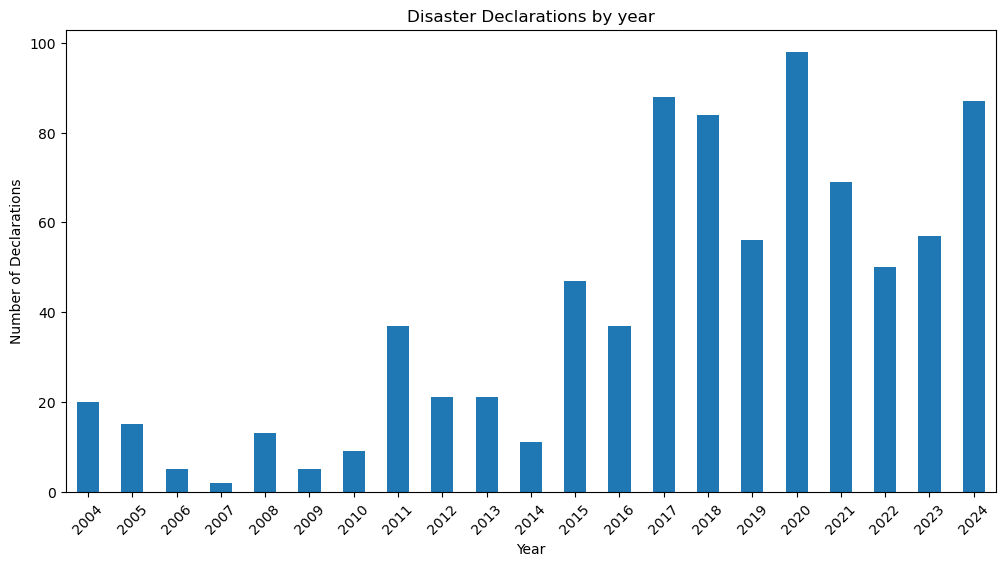

In [12]:
monthly_counts = Disaster_df['formattedyear'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='bar')
plt.title('Disaster Declarations by year')
plt.xlabel('Year')
plt.ylabel('Number of Declarations')
plt.xticks(rotation=45)
plt.show()

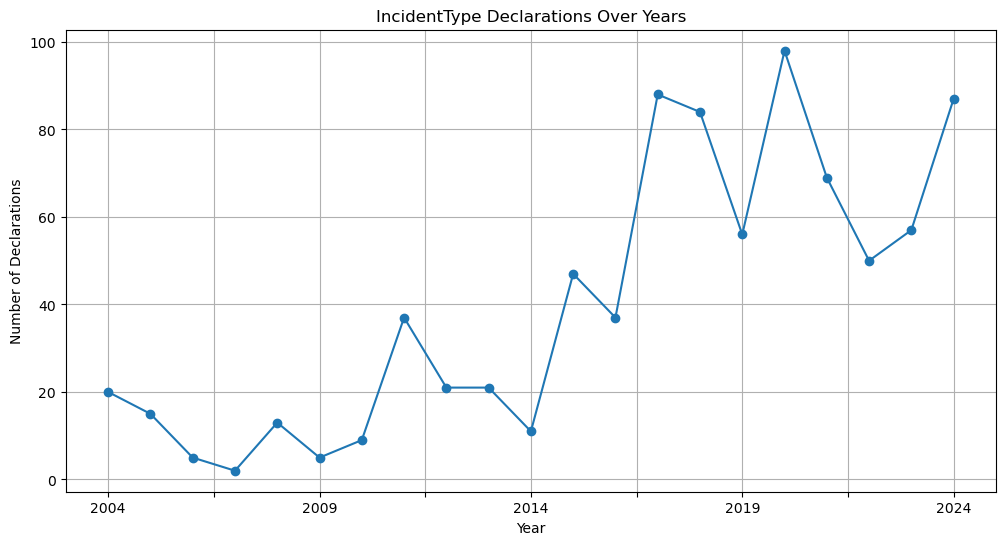

In [13]:
# Count disasters per year
yearly_counts = Disaster_df['formattedyear'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
yearly_counts.plot(kind='line', marker='o')
plt.title('IncidentType Declarations Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Declarations')
plt.grid()
plt.show()

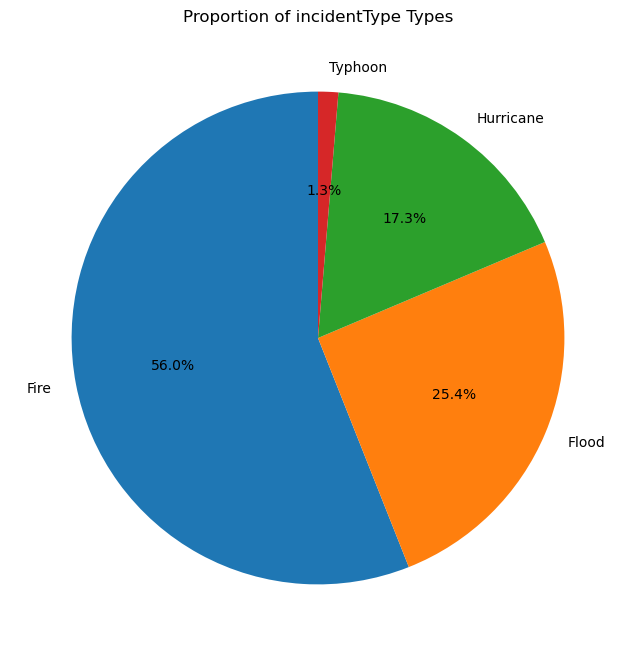

In [14]:
# Assuming you have a 'disasterType' column
disaster_type_counts = Disaster_df['incidentType'].value_counts()

# Plotting
plt.figure(figsize=(8, 8))
disaster_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of incidentType Types')
plt.ylabel('')  # Hide the y-label
plt.show()

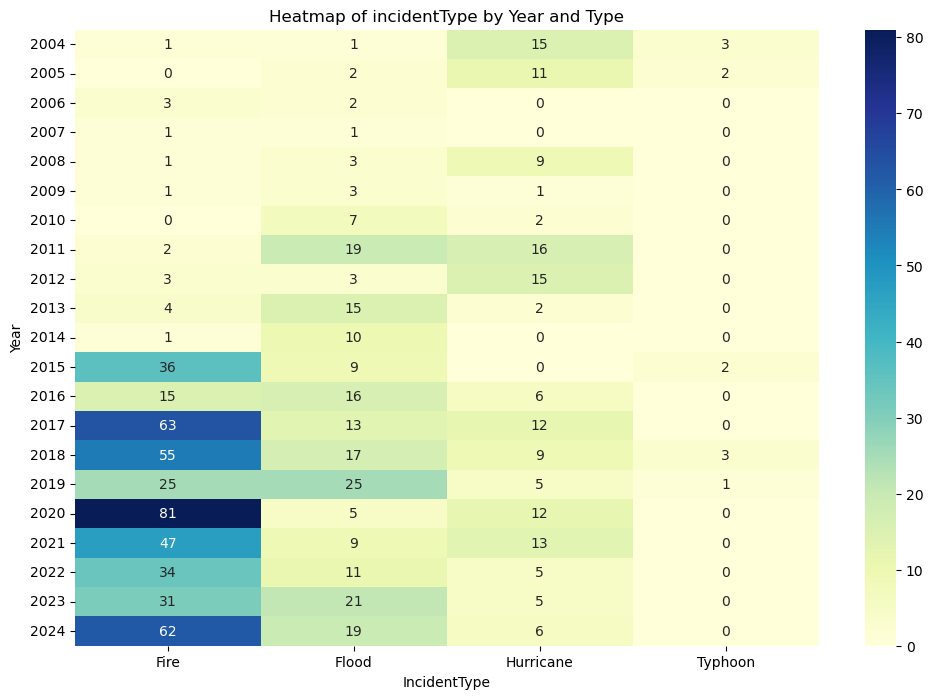

In [15]:
# Pivot table for heatmap
heatmap_data = Disaster_df.pivot_table(index='formattedyear', columns='incidentType', values='declarationDate', aggfunc='count', fill_value=0)

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of incidentType by Year and Type')
plt.xlabel('IncidentType')
plt.ylabel('Year')
plt.show()

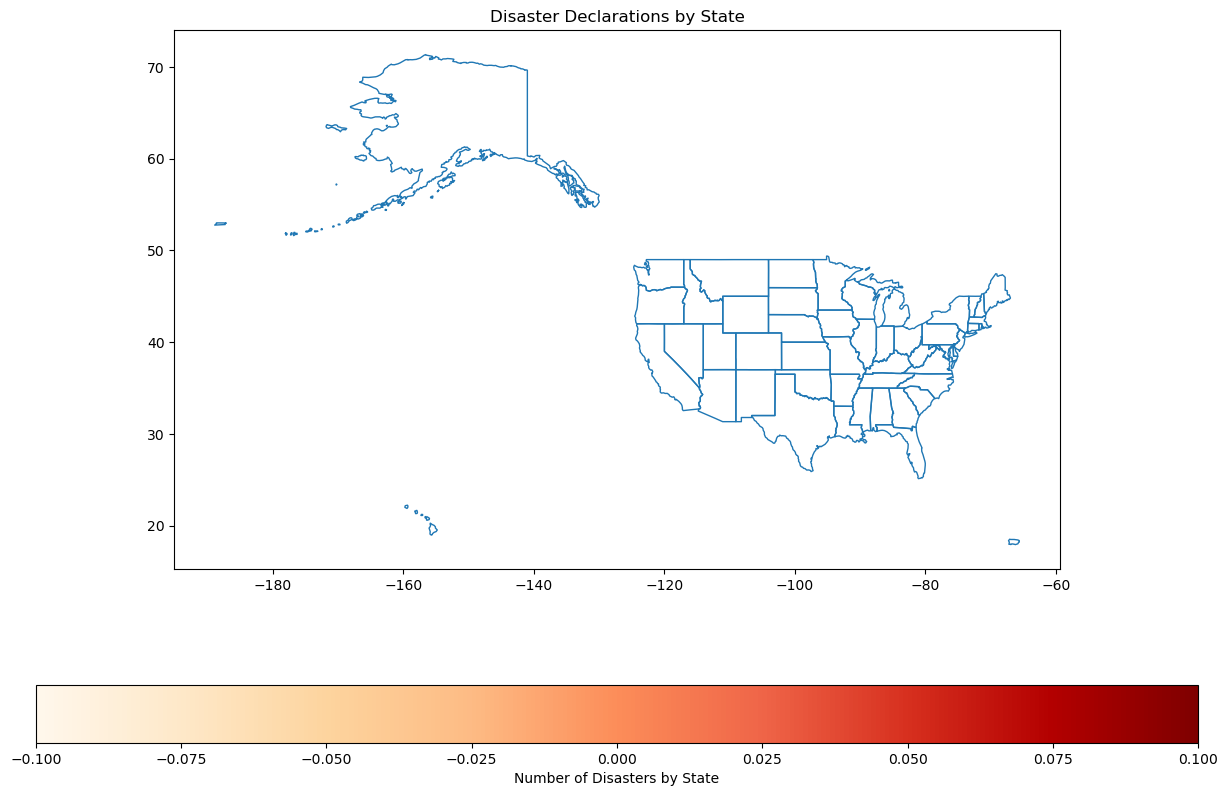

In [16]:
# Plotting the choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.boundary.plot(ax=ax, linewidth=1)
merged.plot(column='disaster_count', ax=ax, legend=True,
            legend_kwds={'label': "Number of Disasters by State",
                         'orientation': "horizontal"},
            cmap='OrRd')

plt.title('Disaster Declarations by State')
plt.show()